In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from VE_scraper_functions import *
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
import time
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Lang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import dataset
path = "park_scrape_content_dataset.xlsx"
park_scrape_dataset2 = pd.read_excel(path)
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
...           ...    ...                                              

In [3]:
## convert all text to lowercase to avoid case sensitivity issues
park_scrape_dataset2['content'] = park_scrape_dataset2['content'].str.lower()
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
...           ...    ...                                              

In [4]:
accessibility_words =  [
        "wheelchair", "disability", "impaired", "disabilities", 
    "handicap", " ada ", "braille", "disabled", "handicapped"]

In [5]:
def count_accessibility_words(text):
    word_counts = {word: text.lower().count(word) for word in accessibility_words}
    return word_counts
word_counts_df = park_scrape_dataset2['content'].apply(count_accessibility_words).apply(pd.Series)
word_counts_df['total'] = word_counts_df.sum(axis=1)
word_counts_df.head()

,wheelchair,disability,impaired,disabilities,handicap,ada,braille,disabled,handicapped,total
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
park_scrape_dataset2 = pd.concat([park_scrape_dataset2, word_counts_df], axis=1)
park_scrape_dataset2 = park_scrape_dataset2.drop("content", axis="columns")
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page website location  park  wheelchair  disability  impaired  disabilities  handicap   ada   braille  disabled  handicapped  total
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI           0           0         0             0         0      0        0         0            0      0
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI           0           0         0             0         0      0        0         0            0      0
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI           0           0         0             0         0      0        0         0            0      0
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI           0           0         0             0         0  

In [7]:
park_scrape_dataset2.to_csv("accesstest.csv")

In [8]:
park_word_counts = park_scrape_dataset2.groupby('park')[accessibility_words].sum()
park_word_counts['total'] = park_word_counts.sum(axis=1)
park_word_counts.head

<bound method NDFrame.head of       wheelchair  disability  impaired  disabilities  handicap   ada   braille  disabled  handicapped  total
park                                                                                                        
ABLI           0           1         0             1         0      0        0         0            0      2
ACAD          43          10         0             6         1      2        4         3            1     70
ADAM           3           3         0             2         1      0        0         1            1     11
AFBG           5           4         1             1         1      2        1         0            1     16
AGFO           5           2         0             1         0      0        9         0            0     17
...          ...         ...       ...           ...       ...    ...      ...       ...          ...    ...
YELL         507           8         2            11         0      3       10         0          

In [9]:
path = "clusterlookup.csv"
clusters = pd.read_csv(path)
clusters.head

<bound method NDFrame.head of     Park Alpha                                      NPS Full Name Region  FinalCluster                   Label
0         ABLI  Abraham Lincoln Birthplace National Historical...    SER             8  High Visitation, Rural
1         ACAD                               Acadia National Park    NER             1            Transit Park
2         ADAM                     Adams National Historical Park    NER             1            Transit Park
3         AFBG            African Burial Ground National Monument    NER             2             Urban Sites
4         AGFO                Agate Fossil Beds National Monument    MWR             7   Low Visitation, Rural
..         ...                                                ...    ...           ...                     ...
383       WWIM                               World War I Memorial    NCR             2             Urban Sites
384       YELL                          Yellowstone National Park    IMR          

In [10]:
clustersubset = clusters[['Park Alpha', "FinalCluster", "Label"]]
clustersubset.rename(columns={'Park Alpha':"park"}, inplace = True)
clusterparks = pd.merge(park_word_counts, clustersubset, on="park", how="left")
clusterparks.head

<bound method NDFrame.head of      park  wheelchair  disability  impaired  disabilities  handicap   ada   braille  disabled  handicapped  total  FinalCluster                   Label
0    ABLI           0           1         0             1         0      0        0         0            0      2           8.0  High Visitation, Rural
1    ACAD          43          10         0             6         1      2        4         3            1     70           1.0            Transit Park
2    ADAM           3           3         0             2         1      0        0         1            1     11           1.0            Transit Park
3    AFBG           5           4         1             1         1      2        1         0            1     16           2.0             Urban Sites
4    AGFO           5           2         0             1         0      0        9         0            0     17           7.0   Low Visitation, Rural
..    ...         ...         ...       ...           ... 

In [11]:
clusterparks.to_csv("accessbypark.csv")

In [12]:
total_parks_counts = clusterparks.groupby('Label').size().reset_index(name='Total_Parks')
total_parks_counts['Total_Parks'] = total_parks_counts['Total_Parks'].astype(int) 
filtered_df = clusterparks[clusterparks['total'] > 1]
ev_parks_counts = filtered_df.groupby('Label').size().reset_index(name='Access_Parks')
label_counts = pd.merge(total_parks_counts, ev_parks_counts, on='Label', how='left')
label_counts['Access_Parks'].fillna(0, inplace=True)
label_counts['Percent_Access'] = round((label_counts['Access_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['Access_Parks'] = label_counts['Access_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,Access_Parks,Percent_Access
0,High Seasonality,43,43,100.0
1,"High Visitation, Rural",56,56,100.0
2,"High Visitation, Urban",37,37,100.0
3,Limited Access,29,29,100.0
4,"Low Visitation, Rural",54,54,100.0


In [13]:
total_row = label_counts.sum(numeric_only=True)
total_row['Label'] = 'Total'
total_counts = label_counts.append(total_row, ignore_index=True)
total_counts['Access_Parks'] = total_counts['Access_Parks'].astype(int)
total_counts['Total_Parks'] = total_counts['Total_Parks'].astype(int)
total_counts.loc[total_counts['Label'] == 'Total', 'Percent_Access'] = round((total_counts.loc[total_counts['Label'] == 'Total', 'Access_Parks'] / total_counts.loc[total_counts['Label'] == 'Total', 'Total_Parks']) * 100, 1)
total_counts.tail()

,Label,Total_Parks,Access_Parks,Percent_Access
5,"Low Visitation, Urban",57,57,100.0
6,Rural Sites,22,22,100.0
7,Transit Park,49,49,100.0
8,Urban Sites,33,33,100.0
9,Total,380,380,100.0


In [14]:
total_counts.to_csv("accessbycluster.csv")

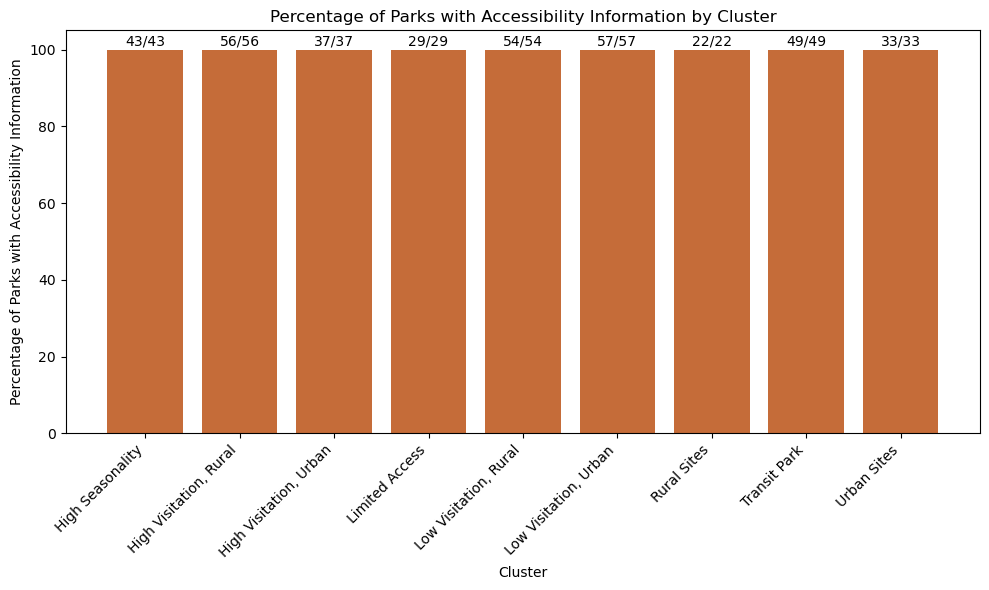

In [15]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_Access'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['Access_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')
    
##avg_percent_ev = label_counts['Percent_Access'].mean()
##plt.axhline(y=avg_percent_ev, color='red', linestyle='--')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Accessibility Information')
plt.title('Percentage of Parks with Accessibility Information by Cluster')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig("AccessGraph.png")
plt.show()

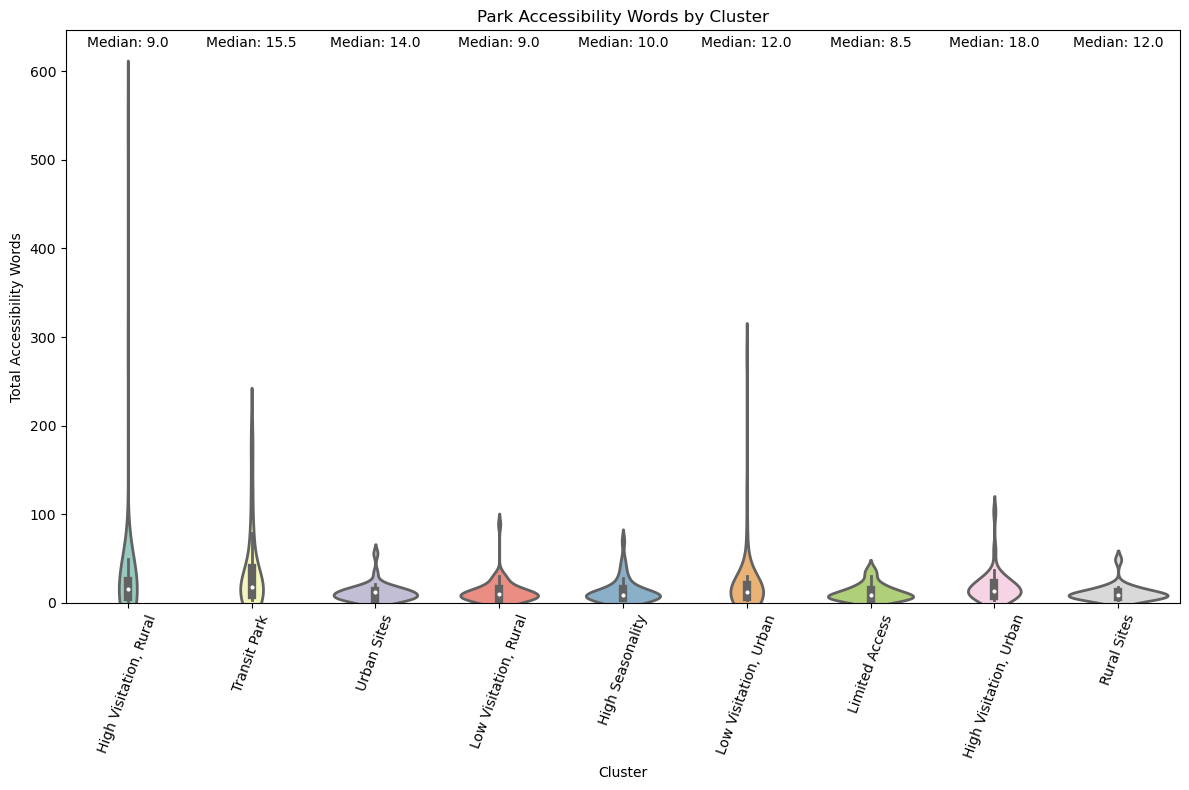

In [16]:
median_totals = clusterparks.groupby('Label')['total'].median().reset_index()
plt.figure(figsize=(12, 8)) 
sns_violin = sns.violinplot(x='Label', y='total', data=clusterparks, palette='Set3', linewidth=2)
max_y = sns_violin.collections[0].get_paths()[0].vertices[:, 1].max()
for i, label in enumerate(median_totals['Label']):
    median_value = median_totals['total'][i]
    plt.text(i, max_y + 0.02 * max_y, f"Median: {median_value}", ha='center', va='bottom')
plt.xlabel('Cluster')
plt.ylabel('Total Accessibility Words')
plt.title('Park Accessibility Words by Cluster')
plt.xticks(rotation=70) 
plt.ylim(0)  
plt.tight_layout()
plt.savefig("AccessViolin.png")
plt.show()

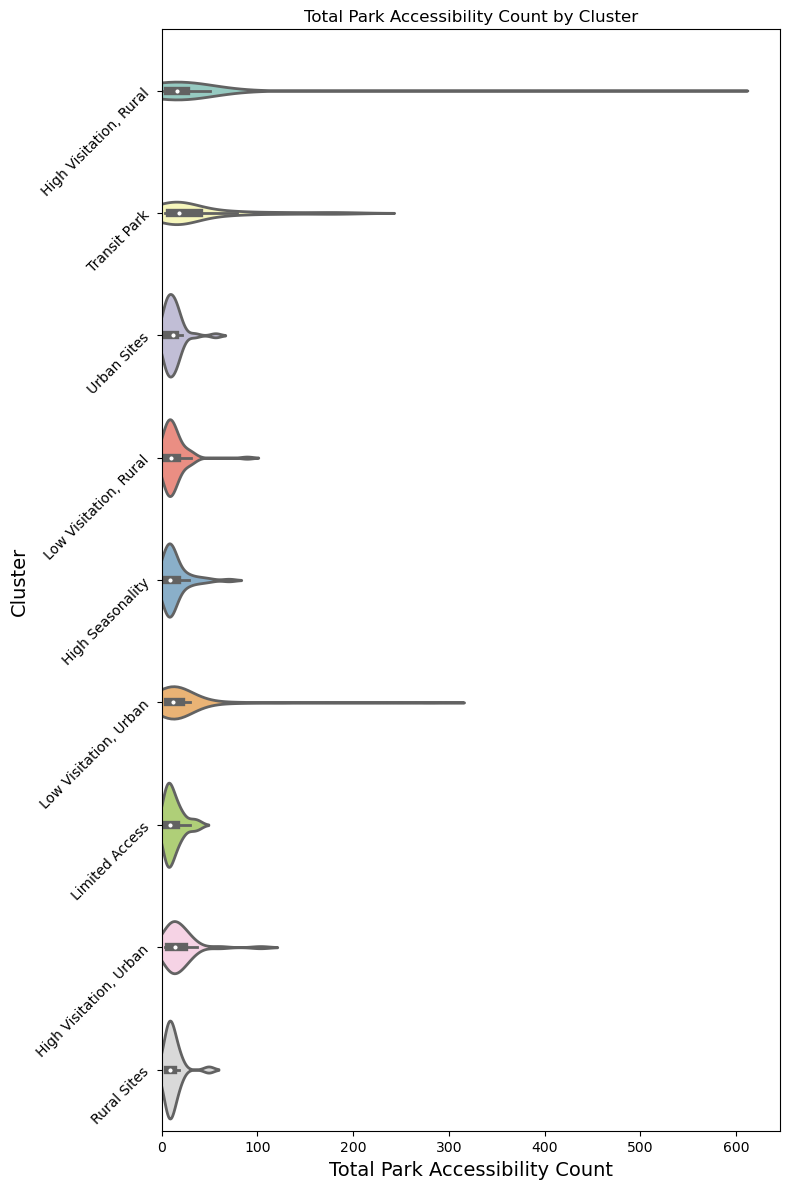

In [17]:
median_totals = clusterparks.groupby('Label')['total'].median().reset_index()
plt.figure(figsize=(8, 12)) 
sns_violin = sns.violinplot(y='Label', x='total', data=clusterparks, palette='Set3', linewidth=2, fontsize=14)

plt.xlabel('Total Park Accessibility Count', fontsize=14)
plt.ylabel('Cluster', fontsize=14)
plt.title('Total Park Accessibility Count by Cluster')
plt.yticks(rotation=45)  # Rotate the y-axis labels for better readability
plt.xlim(0)  
plt.tight_layout()
plt.savefig("FlippedAccessViolin.png")
plt.show()

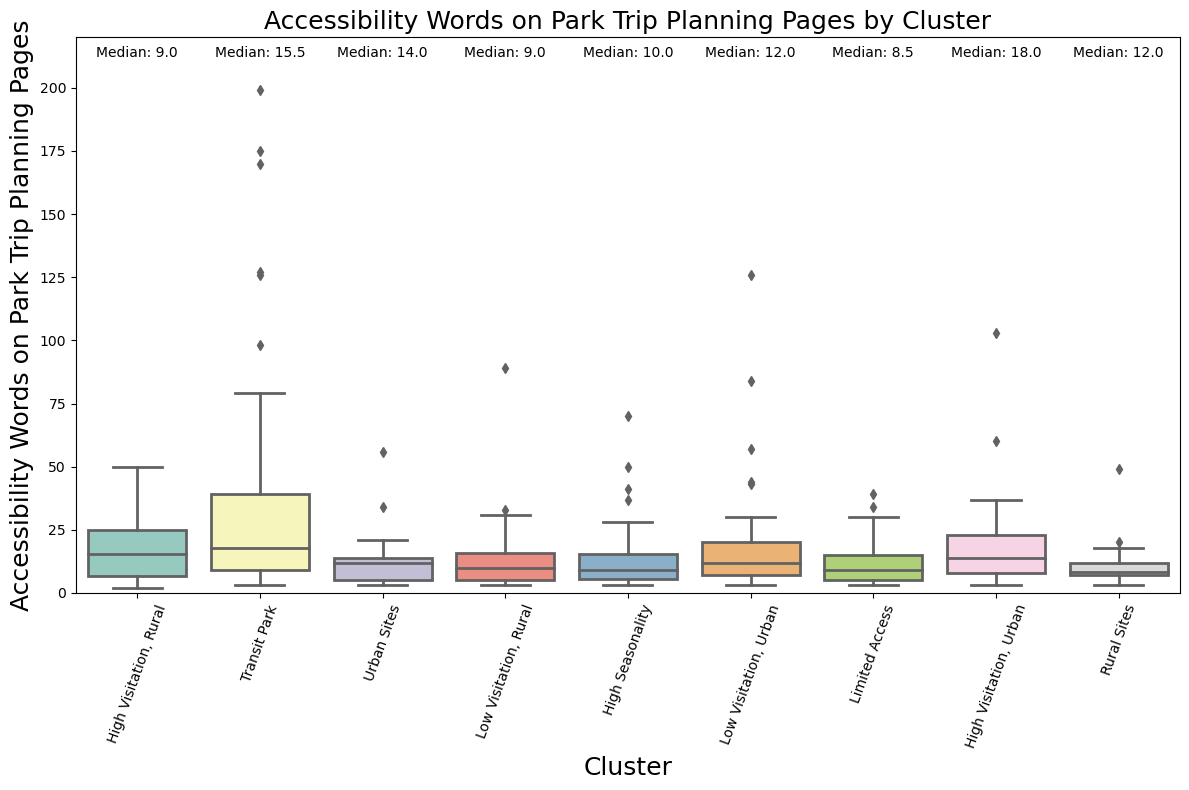

In [18]:
median_totals = clusterparks.groupby('Label')['total'].median().reset_index()

plt.figure(figsize=(12, 8)) 
sns_boxplot = sns.boxplot(x='Label', y='total', data=clusterparks, palette='Set3', linewidth=2)

# Calculate the maximum y-value from the data directly
max_y = clusterparks['total'].max()

for i, label in enumerate(median_totals['Label']):
    median_value = median_totals['total'][i]
    plt.text(i, max_y -330, f"Median: {median_value}", ha='center', va='bottom')

plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Accessibility Words on Park Trip Planning Pages', fontsize=18)
plt.title('Accessibility Words on Park Trip Planning Pages by Cluster', fontsize=18)
plt.xticks(rotation=70) 
plt.ylim(0,220)  
plt.tight_layout()
plt.savefig("AccessBoxplot220.png")
plt.show()

In [19]:
total_pages = park_scrape_dataset2['park'].value_counts().reset_index()
total_pages.columns = ['park', 'pagecount']
total_pages.head()

,park,pagecount
0,YELL,148
1,PORE,130
2,GRCA,128
3,ISRO,109
4,DENA,108


In [20]:
clusterparks = pd.merge(clusterparks, total_pages, on='park', how='left')
clusterparks.head()

,park,wheelchair,disability,impaired,disabilities,handicap,ada,braille,disabled,handicapped,total,FinalCluster,Label,pagecount
0,ABLI,0,1,0,1,0,0,0,0,0,2,8.0,"High Visitation, Rural",15
1,ACAD,43,10,0,6,1,2,4,3,1,70,1.0,Transit Park,74
2,ADAM,3,3,0,2,1,0,0,1,1,11,1.0,Transit Park,28
3,AFBG,5,4,1,1,1,2,1,0,1,16,2.0,Urban Sites,29
4,AGFO,5,2,0,1,0,0,9,0,0,17,7.0,"Low Visitation, Rural",28


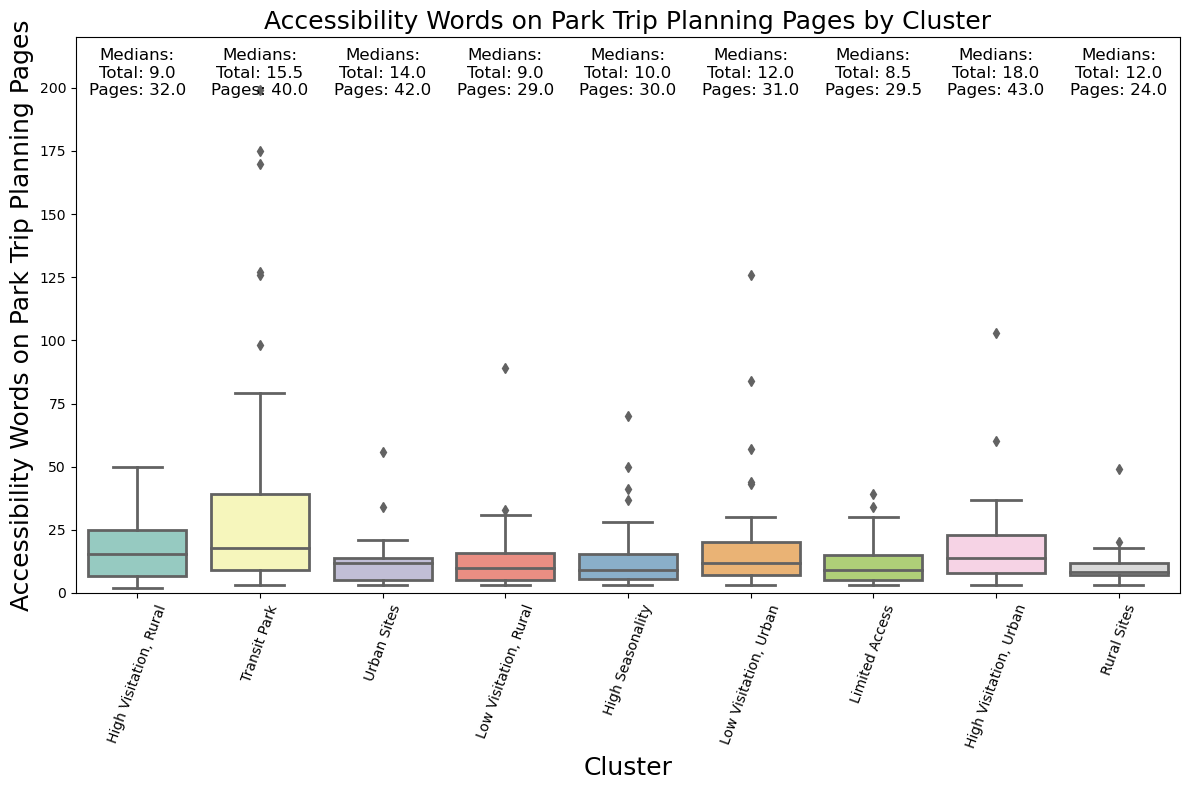

In [21]:
median_totals = clusterparks.groupby('Label')['total'].median().reset_index()

# Calculate median of 'pagecount' in each cluster
median_pagecount = clusterparks.groupby('Label')['pagecount'].median().reset_index()

plt.figure(figsize=(12, 8)) 
sns_boxplot = sns.boxplot(x='Label', y='total', data=clusterparks, palette='Set3', linewidth=2)

# Calculate the maximum y-value from the data directly
max_y = clusterparks['total'].max()

# Add median labels for 'total'
for i, label in enumerate(median_totals['Label']):
    median_value_total = median_totals['total'][i]
    median_value_pagecount = median_pagecount['pagecount'][i]
    plt.text(i, max_y - 345, f"Medians:\nTotal: {median_value_total}\nPages: {median_value_pagecount}", ha='center', va='bottom', fontsize=12)

plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Accessibility Words on Park Trip Planning Pages', fontsize=18)
plt.title('Accessibility Words on Park Trip Planning Pages by Cluster', fontsize=18)
plt.xticks(rotation=70) 
plt.ylim(0, 220)  
plt.tight_layout()
plt.savefig("AccessBoxplot2Label.png")
plt.show()

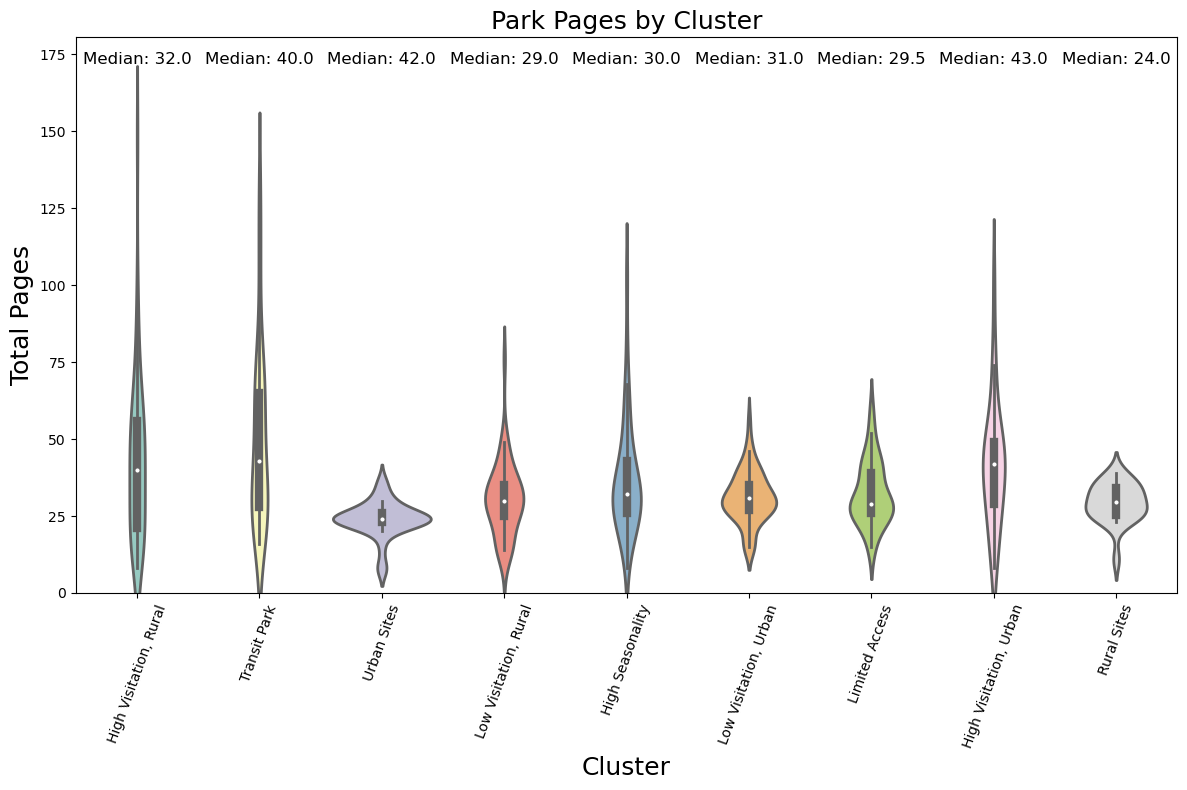

In [26]:
median_pagecount = clusterparks.groupby('Label')['pagecount'].median().reset_index()
plt.figure(figsize=(12, 8)) 
sns_violin = sns.violinplot(x='Label', y='pagecount', data=clusterparks, palette='Set3', linewidth=2)
for i, label in enumerate(median_pagecount['Label']):
    median_value_pagecount = median_pagecount['pagecount'][i]
    plt.text(i,  max_y - 370, f"Median: {median_value_pagecount}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Total Pages', fontsize=18)
plt.title('Park Pages by Cluster', fontsize=18)
plt.xticks(rotation=70) 
plt.ylim(0)  
plt.tight_layout()
plt.savefig("PagesViolin.png")
plt.show()

In [23]:
clusterparks.to_csv("accessbyparkpages.csv")

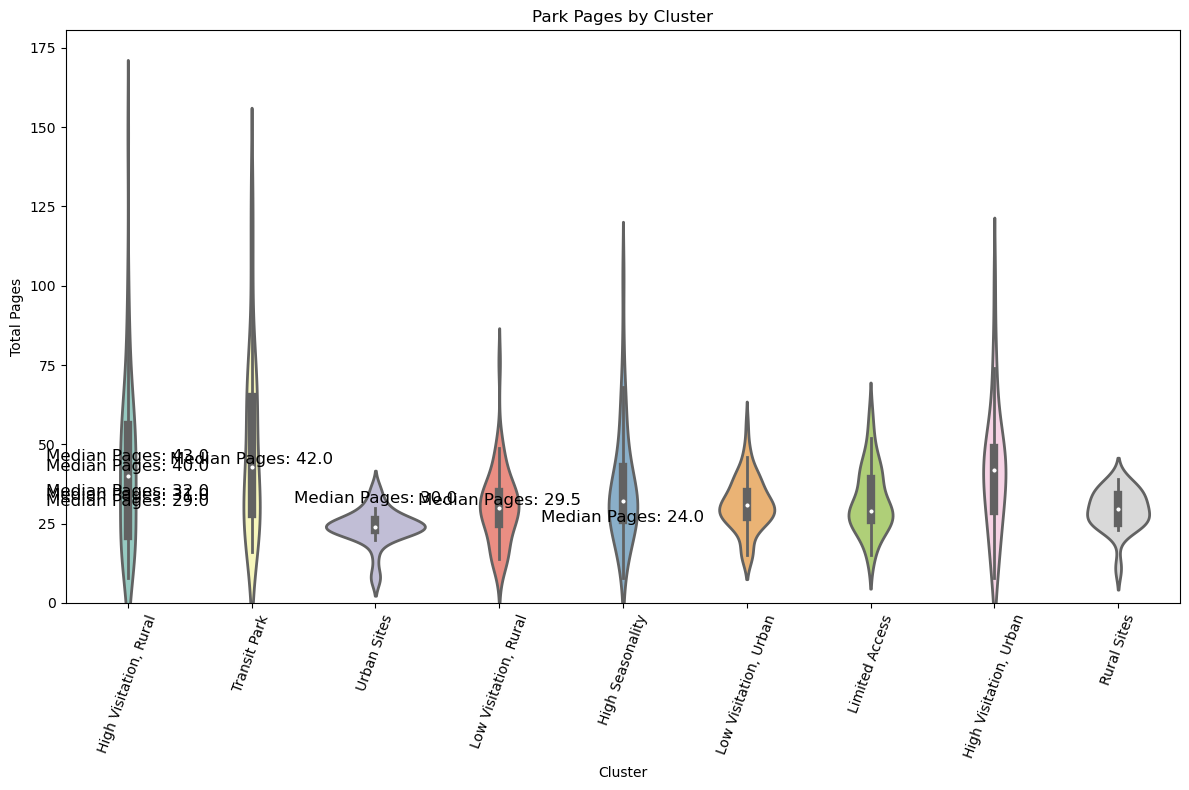

In [31]:
plt.figure(figsize=(12, 8)) 
sns_violin = sns.violinplot(x='Label', y='pagecount', data=clusterparks, palette='Set3', linewidth=2)

# Calculate median of 'pagecount' in each cluster
median_pagecount = clusterparks.groupby('Label')['pagecount'].median().reset_index()

# Add median pagecount values to the violin plot
for i, label in enumerate(median_pagecount['Label']):
    median_value_pagecount = median_pagecount['pagecount'][i]
    # Get the x-coordinate of the median_value_pagecount label
    x_coord = sns_violin.collections[i].get_paths()[0].vertices[:, 0].mean()
    plt.text(x_coord, median_value_pagecount + 0.02 * median_value_pagecount, f"Median Pages: {median_value_pagecount}", ha='center', va='bottom', fontsize=12)

plt.xlabel('Cluster')
plt.ylabel('Total Pages')
plt.title('Park Pages by Cluster')
plt.xticks(rotation=70) 
plt.ylim(0)  
plt.tight_layout()

plt.show()

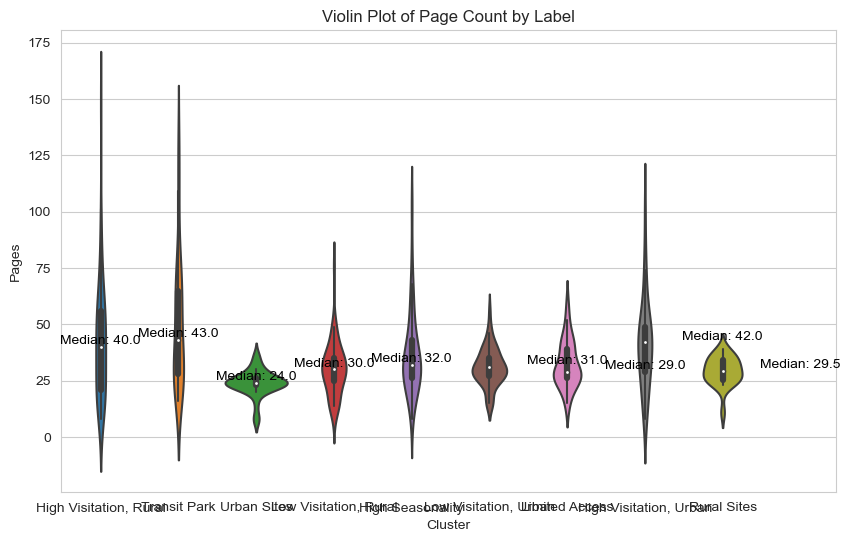

In [35]:


# Create the violin plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=clusterparks, x='Label', y='pagecount')

# Add median annotations
medians = clusterparks.groupby(['Label'])['pagecount'].median().reset_index()
for i in range(len(medians)):
    label_group = medians.iloc[i]['Label']
    median_value = medians.iloc[i]['pagecount']
    x_offset = clusterparks['Label'].unique().tolist().index(label_group)
    plt.text(x_offset, median_value, f"Median: {median_value}",
             ha='center', va='bottom', color='black', fontsize=10)
    # Adding an offset to the y-coordinate of the annotation text
    plt.plot([x_offset, x_offset], [median_value, median_value], color='black', linewidth=1)

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Pages')
plt.title('Violin Plot of Page Count by Label')

# Show the plot
plt.show()

In [36]:
median_pages_per_label = clusterparks.groupby('Label')['pagecount'].median().reset_index()

# Rename the column to reflect median
median_pages_per_label.rename(columns={'pagecount': 'Median_Pagecount'}, inplace=True)

# Display the new dataframe
print(median_pages_per_label)

                    Label  Median_Pagecount
0        High Seasonality              32.0
1  High Visitation, Rural              40.0
2  High Visitation, Urban              42.0
3          Limited Access              29.0
4   Low Visitation, Rural              30.0
5   Low Visitation, Urban              31.0
6             Rural Sites              29.5
7            Transit Park              43.0
8             Urban Sites              24.0


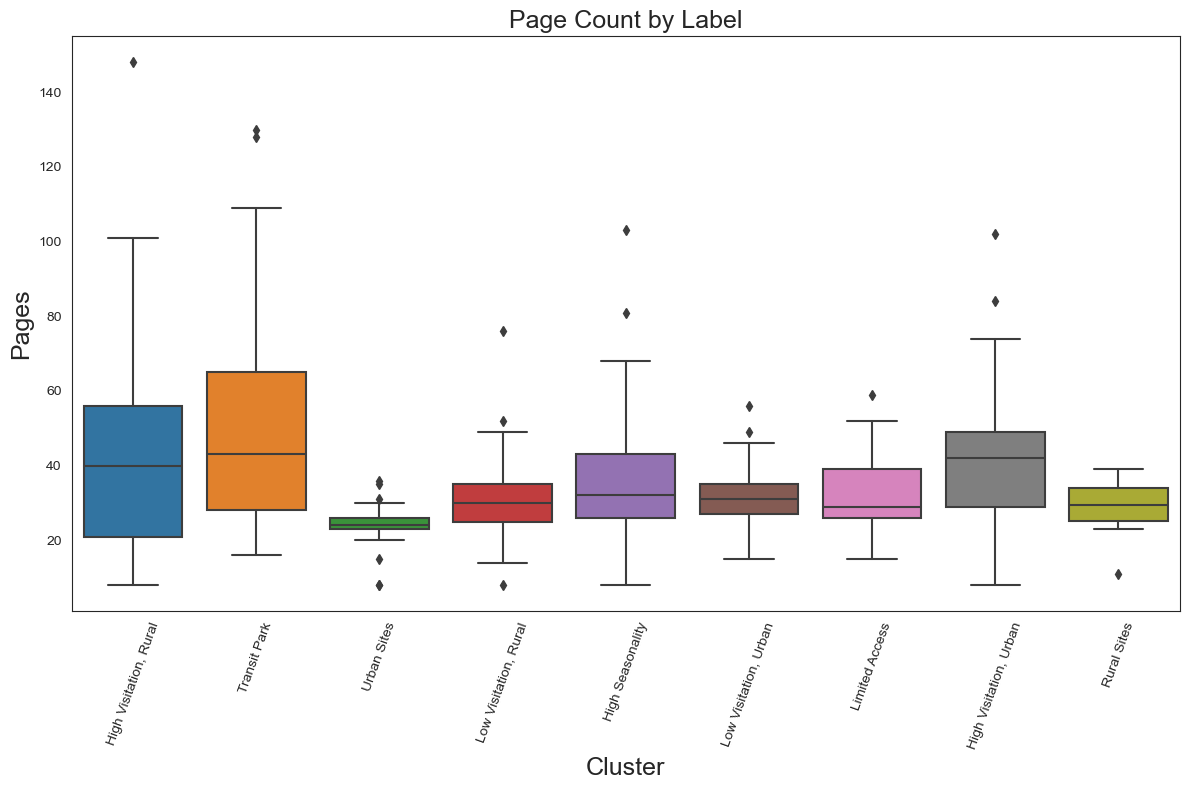

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'clusterparks' is your dataframe
# Assuming 'Label' and 'pagecount' are columns in your dataframe

# Set the style of the seaborn and figure size
sns.set_style("white")
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(data=clusterparks, x='Label', y='pagecount')
# Set the labels and title
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Pages', fontsize=18)
plt.title('Page Count by Label', fontsize=18)
plt.xticks(rotation=70) 
plt.tight_layout()
plt.savefig("PagesBox.png")
# Show the plot
plt.show()
